# A Textual Analysis of songs by popular artists by generation.

Lyrics will be extracted from the website AZLyrics.com.

# Scraping data

In [8]:
import time
import random
import os
from string import ascii_lowercase
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [188]:
import time
import random
import os
from string import ascii_lowercase
from bs4 import BeautifulSoup
from urllib.request import urlopen

def get_lyrics(
    song_url, 
    save=True, 
    by_decade=False, 
    replace=True, 
    folder="songs"
):
    song = urlopen(song_url)
    soup = BeautifulSoup(song, "html.parser")
    html_pointer = soup.find('div', attrs={'class':'ringtone'})
    title = html_pointer.find_next('b').contents[0].strip()
    lyrics = html_pointer.find_next('div').text.strip()
    file_title = title.replace(" ", "_")
    file_title = title.replace("/", "_")
    album = soup.find_all(class_="songinalbum_title")
    if not save:
        return title, lyrics, year
    else:
        if os.path.exists(os.path.relpath(folder + "/all/")):
            save_file(path=folder + "/all/" + file_title, text=lyrics, replace=replace)
        else:
            os.makedirs(os.path.relpath(folder + "/all/"))
            save_file(path=folder + "/all/" + file_title, text=lyrics, replace=replace)

def scrape_artist(
    az_url, 
    sleep=16, 
    by_decade=True, 
    replace=True, 
    folder="songs"
):
    home = "https://www.azlyrics.com/"
    main_page = urlopen(az_url)
    bs = BeautifulSoup(main_page.read(), "html.parser")
    divs = bs.find_all('div', {"class": "listalbum-item"})
    urls = list()
    for d in divs:
        link = d.a
        if link is not None:
            urls.append(home + link['href'].split("/", 1)[1])
    n = len(urls)
    k = round(n*0.25)
    urls = urls[::k+1]
    n = len(urls)
    i = 1
    for url in urls:
        get_lyrics(url, save=True, by_decade=by_decade, replace=replace, folder=folder)
        if sleep == "random":
            rt = random.randint(5, 15)
            t = 10
        else:
            rt = t = sleep
        print("Songs downloaded:", i, "/", n, " -  ETA:", round(t*(n-i)/60, 2), "minutes")
        i += 1
        time.sleep(rt)  # This is to avoid being recognized as a bot

In [189]:
boomer_artists = {'beatles': 'https://www.azlyrics.com/b/beatles.html', 'dylan': 'https://www.azlyrics.com/d/dylan.html',
           'pinkfloyd': 'https://www.azlyrics.com/p/pinkfloyd.html', 'elvis': 'https://www.azlyrics.com/e/elvis.html', 
           'zeppelin':'https://www.azlyrics.com/l/ledzeppelin.html'}
genx_artists = {'jackson':'https://www.azlyrics.com/j/jackson.html', 'madonna':'https://www.azlyrics.com/m/madonna.html', 
               'queen': 'https://www.azlyrics.com/q/queen.html', 'nirvana': 'https://www.azlyrics.com/n/nirvana.html', 
               'metallica': 'https://www.azlyrics.com/m/metallica.html'}
mil_artists = {'eminem': 'https://www.azlyrics.com/e/eminem.html', 'linkin': 'https://www.azlyrics.com/l/linkinpark.html', 
              'u2': 'https://www.azlyrics.com/u/u2band.html', 'spears':'https://www.azlyrics.com/s/spears.html', 
              'beyonce': 'https://www.azlyrics.com/k/knowles.html'}
genz_artists = {'drake': 'https://www.azlyrics.com/d/drake.html', 'swift': 'https://www.azlyrics.com/t/taylorswift.html', 
               'weeknd':'https://www.azlyrics.com/w/weeknd.html', 'mars': 'https://www.azlyrics.com/b/brunomars.html', 
               'adele': 'https://www.azlyrics.com/a/adele.html'}

In [190]:
dictList = [boomer_artists, genx_artists, mil_artists, genz_artists]
for x in dictList:
    for key in x:
        scrape_artist(x[key], folder=key)

Songs downloaded: 1 / 4  -  ETA: 0.8 minutes
Songs downloaded: 2 / 4  -  ETA: 0.53 minutes
Songs downloaded: 3 / 4  -  ETA: 0.27 minutes
Songs downloaded: 4 / 4  -  ETA: 0.0 minutes
Songs downloaded: 1 / 4  -  ETA: 0.8 minutes
Songs downloaded: 2 / 4  -  ETA: 0.53 minutes
Songs downloaded: 3 / 4  -  ETA: 0.27 minutes
Songs downloaded: 4 / 4  -  ETA: 0.0 minutes
Songs downloaded: 1 / 4  -  ETA: 0.8 minutes
Songs downloaded: 2 / 4  -  ETA: 0.53 minutes
Songs downloaded: 3 / 4  -  ETA: 0.27 minutes
Songs downloaded: 4 / 4  -  ETA: 0.0 minutes
Songs downloaded: 1 / 4  -  ETA: 0.8 minutes
Songs downloaded: 2 / 4  -  ETA: 0.53 minutes
Songs downloaded: 3 / 4  -  ETA: 0.27 minutes
Songs downloaded: 4 / 4  -  ETA: 0.0 minutes
Songs downloaded: 1 / 4  -  ETA: 0.8 minutes
Songs downloaded: 2 / 4  -  ETA: 0.53 minutes
Songs downloaded: 3 / 4  -  ETA: 0.27 minutes
Songs downloaded: 4 / 4  -  ETA: 0.0 minutes
Songs downloaded: 1 / 4  -  ETA: 0.8 minutes
Songs downloaded: 2 / 4  -  ETA: 0.53 minutes

# Processing and organizing data

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/emrekurt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emrekurt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:

def process_text(text):
    clean_text = text
    
    # 1. Cleaning
    clean_text = BeautifulSoup(clean_text).get_text()
    clean_text = clean_text.lower()
    
    # 2. tokenizing
    tokens = word_tokenize(clean_text)
    
    # 2.1 stopwords, punctuation
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')

    clean_tokens = []
    for token in tokens:
        if token not in stopwords and token.isalpha():
            clean_tokens.append(token)
   
    return ' '.join(clean_tokens)


In [10]:
import numpy as np
import pandas as pd

In [12]:
#Boomer music
rows = []
for song in os.listdir('beatles/all/'):
    with open('beatles/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
beatles = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])


rows = []
for song in os.listdir('dylan/all/'):
    with open('dylan/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
dylan = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])


rows = []
for song in os.listdir('pinkfloyd/all/'):
    with open('pinkfloyd/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
pinkfloyd = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      
        
rows = []
for song in os.listdir('elvis/all/'):
    with open('elvis/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
elvis = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      
              
        
rows = []
for song in os.listdir('zeppelin/all/'):
    with open('zeppelin/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
zeppelin = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      
 
zeppelin

,Song Title,Processed Lyrics
0,Houses Of The Holy,let take movie take show let ever truly make g...
1,That's The Way,know going tell ca play know gon na mama told ...
2,All My Love,fall love fire light chase feather wind within...
3,Good Times Bad Times,days youth told means man reached age tried th...


In [13]:
#Gen X music

rows = []
for song in os.listdir('jackson/all/'):
    with open('jackson/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
jackson = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      
 
    

rows = []
for song in os.listdir('madonna/all/'):
    with open('madonna/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
madonna = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      
 
    
rows = []
for song in os.listdir('queen/all/'):
    with open('queen/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
queen = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      
 
    
rows = []
for song in os.listdir('nirvana/all/'):
    with open('nirvana/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
nirvana = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      
 
    
rows = []
for song in os.listdir('metallica/all/'):
    with open('metallica/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
metallica = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      

nirvana

,Song Title,Processed Lyrics
0,Mexican Seafood,ah itchy flakes inflaming gels creams pertaini...
1,Old Age,rolling one day complete service one high deca...
2,Scentless Apprentice,like babies smell like butter smell smelled li...
3,Blew,would mind would like blew would mind would li...


In [14]:
#Millenial music

rows = []
for song in os.listdir('eminem/all/'):
    with open('eminem/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
eminem = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      


rows = []
for song in os.listdir('linkin/all/'):
    with open('linkin/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
linkin = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      



rows = []
for song in os.listdir('u2/all/'):
    with open('u2/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
u2 = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      


rows = []
for song in os.listdir('spears/all/'):
    with open('spears/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
spears = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      


rows = []
for song in os.listdir('beyonce/all/'):
    with open('beyonce/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
beyonce = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      

u2

,Song Title,Processed Lyrics
0,I Will Follow,follow outside said said needed looking blind ...
1,Raised By Wolves,face broken street man corner pool misery whit...
2,All Along The Watchtower,must way said joker thief much confusion ca ge...
3,Silver And Gold,shithouse shotgun praying hands hold hunter hu...


In [15]:
#Gen Z music
rows = []
for song in os.listdir('drake/all/'):
    with open('drake/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
drake = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      


rows = []
for song in os.listdir('swift/all/'):
    with open('swift/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
swift = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      


rows = []
for song in os.listdir('weeknd/all/'):
    with open('weeknd/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
weeknd = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      


rows = []
for song in os.listdir('mars/all/'):
    with open('mars/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
mars = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      


rows = []
for song in os.listdir('adele/all/'):
    with open('adele/all/'+song) as f:
        lines = f.readlines()
        text = ''.join(lines)
    title = song[:len(song) - 4].replace('"','').replace('','')
    rows.append([title, process_text(text)])
adele = pd.DataFrame(rows, columns=["Song Title", "Processed Lyrics"])      

drake

,Song Title,Processed Lyrics
0,Get It Together,hello hurt many times got point decided ca any...
1,Get Along Better,uh might real real hold closer trying times su...
2,"You Know, You Know",know know know know uh know know story goes do...
3,Intro,yo going drake let know witness right drake dj...


In [260]:
boomer_songs = pd.concat([beatles, dylan, pinkfloyd, elvis, zeppelin])
genx_songs = pd.concat([jackson, madonna, queen, nirvana, metallica])
mil_songs = pd.concat([eminem, linkin, u2, spears, beyonce])
genz_songs = pd.concat([drake, swift, weeknd, mars, adele])

lyrics_list = [boomer_songs, genx_songs, mil_songs, genz_songs]

# Analytics

In [261]:
import math
for dfs in lyrics_list:
    dfs['Total Words'] = dfs['Processed Lyrics'].str.split().str.len()
    dfs['Unique Words'] = dfs['Processed Lyrics'].apply(lambda x: len(set(x.split())))
    dfs['R Value'] = dfs['Unique Words']/np.sqrt(dfs['Total Words'])

/Users/emrekurt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/emrekurt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/emrekurt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

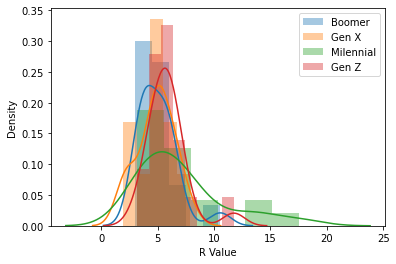

In [305]:
import seaborn as sns
sns.distplot(boomer_songs['R Value'], label='Boomer')
sns.distplot(genx_songs['R Value'], label='Gen X')
sns.distplot(mil_songs['R Value'], label='Milennial')
sns.distplot(genz_songs['R Value'], label='Gen Z')
plt.legend()
plt.show()
# for dfs in lyrics_list:
#     sns.displot(data = dfs['R Value'])

<AxesSubplot:xlabel='Generation', ylabel='Total R Value'>

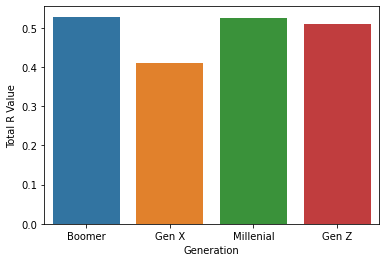

In [263]:
stats_frame = pd.DataFrame({0: [boomer_songs['Unique Words'].sum()/boomer_songs['Total Words'].sum(),boomer_songs['R Value'].mean(),boomer_songs['R Value'].median(),   'Boomer', ], 1: [genx_songs['Unique Words'].sum()/genx_songs['Total Words'].sum(),genx_songs['R Value'].mean(),genx_songs['R Value'].median(), 'Gen X'], 
              2: [mil_songs['Unique Words'].sum()/mil_songs['Total Words'].sum(),mil_songs['R Value'].mean(),mil_songs['R Value'].median(), 'Millenial'], 3: [genz_songs['Unique Words'].sum()/genz_songs['Total Words'].sum(),genz_songs['R Value'].mean(),genz_songs['R Value'].median(), 'Gen Z']}).T.rename(columns={0: "Total R Value", 1:"Mean R Value", 2:"Median R Value", 3:"Generation"})

#Plotting total, mean, and median R values for each generation
sns.barplot(x='Generation', y="Total R Value", data=stats_frame)

<AxesSubplot:xlabel='Generation', ylabel='Mean R Value'>

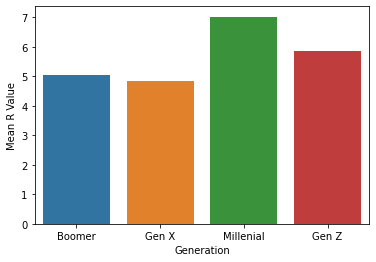

In [264]:
sns.barplot(x='Generation', y="Mean R Value", data=stats_frame)

<AxesSubplot:xlabel='Generation', ylabel='Median R Value'>

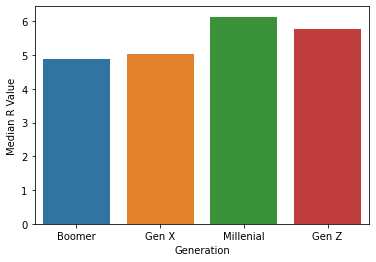

In [265]:
sns.barplot(x='Generation', y="Median R Value", data=stats_frame)

In [266]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

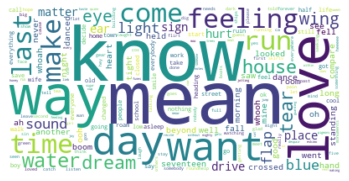

In [267]:
#Word clouds for each generation
boomer_all = ' '.join(boomer_songs['Processed Lyrics'])
boomerCloud = WordCloud(background_color="white").generate(' '.join(dict.fromkeys(boomer_all.split())))
plt.imshow(boomerCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

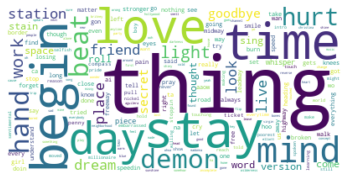

In [268]:
genx_all = ' '.join(genx_songs['Processed Lyrics'])
genXCloud = WordCloud(background_color="white").generate(' '.join(dict.fromkeys(genx_all.split())))
plt.imshow(genXCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

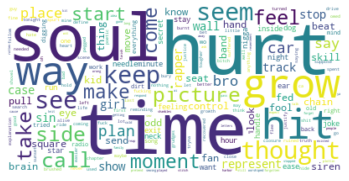

In [269]:
mil_all = ' '.join(mil_songs['Processed Lyrics'])
milXCloud = WordCloud(background_color="white").generate(' '.join(dict.fromkeys(mil_all.split())))
plt.imshow(milXCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

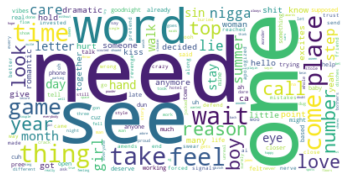

In [270]:
genz_all = ' '.join(genz_songs['Processed Lyrics'])
genZCloud = WordCloud(background_color="white").generate(' '.join(dict.fromkeys(genz_all.split())))
plt.imshow(genZCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [271]:
boomer_all = ' '.join(dict.fromkeys(boomer_all.split()))
genx_all = ' '.join(dict.fromkeys(genx_all.split()))
mil_all = ' '.join(dict.fromkeys(mil_all.split()))
genz_all = ' '.join(dict.fromkeys(genz_all.split()))

In [272]:
#Readability for each generation
import textstat
print(f'Flesch Reading Ease Score for the Baby Boomer songs is: {textstat.flesch_reading_ease(boomer_all)}')
print(f'Flesch Reading Ease Score for the Gen X songs is: {textstat.flesch_reading_ease(genx_all)}')
print(f'Flesch Reading Ease Score for the Milennial songs is: {textstat.flesch_reading_ease(mil_all)}')
print(f'Flesch Reading Ease Score for the Gen Z songs is: {textstat.flesch_reading_ease(genz_all)}')

Flesch Reading Ease Score for the Baby Boomer songs is: -576.44
Flesch Reading Ease Score for the Gen X songs is: -637.68
Flesch Reading Ease Score for the Milennial songs is: -1379.98
Flesch Reading Ease Score for the Gen Z songs is: -762.52


In [273]:
#NRC Word-Emotion Association Lexicon for each generation
from nrclex import NRCLex

In [274]:
boomer_emotion = NRCLex(boomer_all)
boomer_emotion_dict = boomer_emotion.raw_emotion_scores
boomer_emotion_dict.update({"Generation":'Baby Boomer'})
emotion_frame = pd.DataFrame(boomer_emotion_dict, index=[0])

In [275]:
genx_emotion = NRCLex(genx_all)
genx_emotion_dict = genx_emotion.raw_emotion_scores
genx_emotion_dict.update({"Generation":'Gen X'})
emotion_frame = emotion_frame.append(genx_emotion_dict, ignore_index=True)

In [276]:
mil_emotion = NRCLex(mil_all)
mil_emotion_dict = mil_emotion.raw_emotion_scores
mil_emotion_dict.update({"Generation":'Milennial'})
emotion_frame = emotion_frame.append(mil_emotion_dict, ignore_index=True)

In [277]:
genz_emotion = NRCLex(genz_all)
genz_emotion_dict = genz_emotion.raw_emotion_scores
genz_emotion_dict.update({"Generation":'Gen Z'})
emotion_frame = emotion_frame.append(genz_emotion_dict, ignore_index=True)

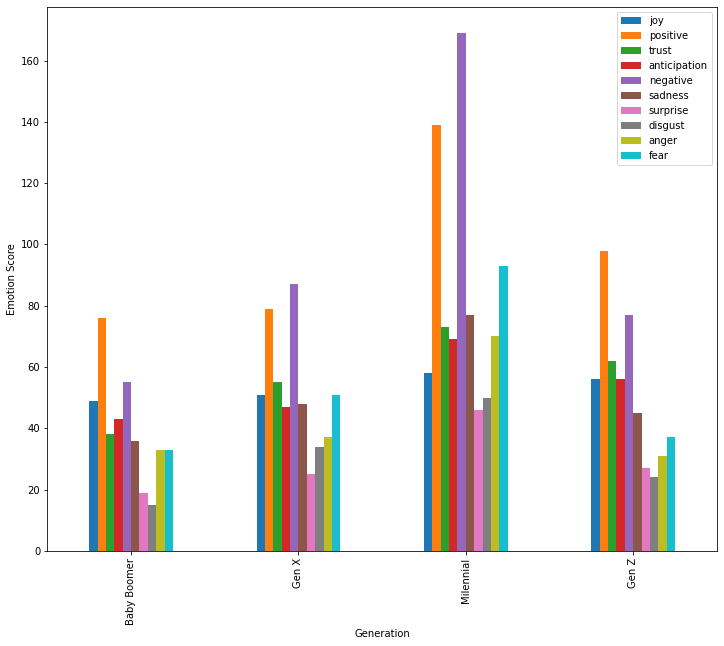

In [278]:
emotion_frame.plot(x='Generation', y=['joy', 'positive', 'trust', 'anticipation', 'negative', 'sadness', 'surprise', 'disgust', 'anger','fear'], kind='bar', figsize=(12,10))
plt.ylabel('Emotion Score')
plt.show()

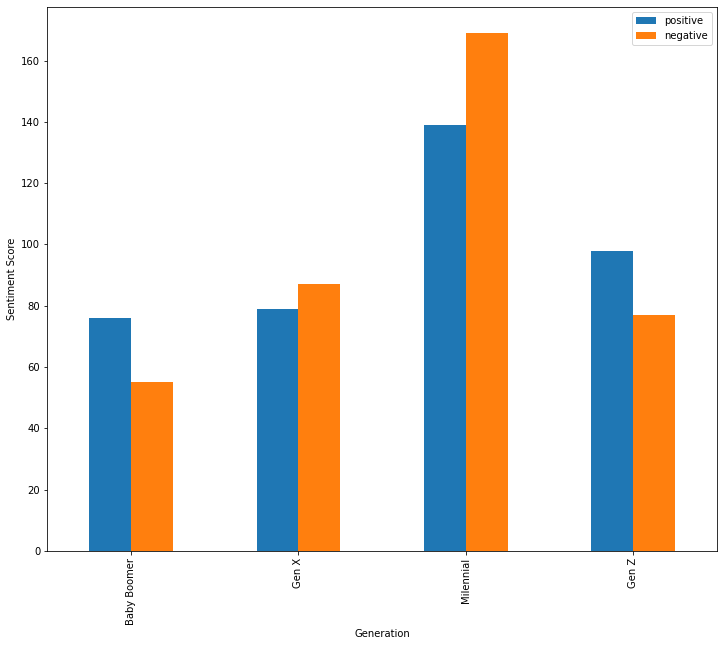

In [279]:
emotion_frame.plot(x='Generation', y=['positive','negative'], kind='bar', figsize=(12,10))
plt.ylabel('Sentiment Score')
plt.show()

In [283]:
#similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(stop_words = 'english', min_df = 0.2, ngram_range = (1,2))
lyrics_data = [boomer_all, genx_all, mil_all, genz_all]
corpus_cv = cv.fit_transform(lyrics_data)

In [294]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = ['Boomer', 'Gen X', 'Milennial', 'Gen Z']
  df.index = ['Boomer', 'Gen X', 'Milennial', 'Gen Z']
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

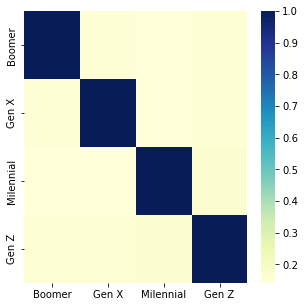

In [295]:
pairwise_sim = cosine_similarity(corpus_cv)
create_heatmap(pd.DataFrame(pairwise_sim, columns = ['Boomer', 'Gen X', 'Milennial', 'Gen Z'], index = ['Boomer', 'Gen X', 'Milennial', 'Gen Z']))

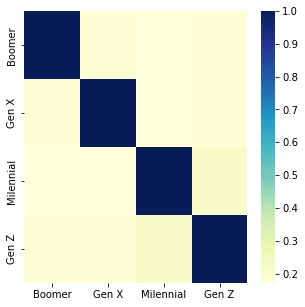

In [296]:
tfidf_vect = TfidfVectorizer()
vector_matrix = tfidf_vect.fit_transform(lyrics_data)
pairwise_sim_tfidf = cosine_similarity(vector_matrix)
create_heatmap(pd.DataFrame(pairwise_sim_tfidf, columns = ['Boomer', 'Gen X', 'Milennial', 'Gen Z'], index = ['Boomer', 'Gen X', 'Milennial', 'Gen Z']))

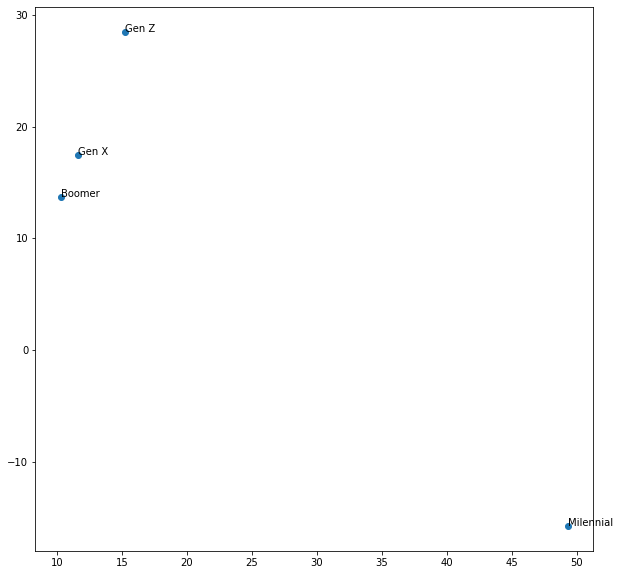

In [297]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
svd = TruncatedSVD(n_components=2)
X_r = svd.fit_transform(corpus_cv)

xs = [xs for xs, ys in X_r]
ys = [ys for xs, ys in X_r]

fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(xs, ys)

for i, txt in enumerate(['Boomer', 'Gen X', 'Milennial', 'Gen Z']):
    ax.annotate(txt, (xs[i], ys[i]))

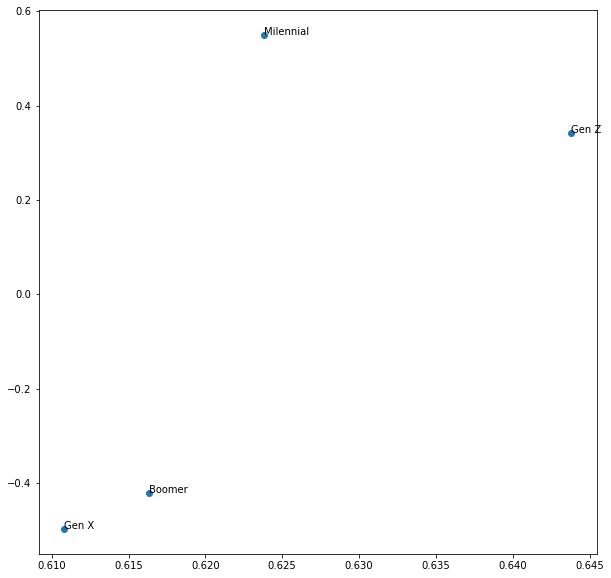

In [298]:
svd = TruncatedSVD(n_components=2)
X_r = svd.fit_transform(vector_matrix)

xs = [xs for xs, ys in X_r]
ys = [ys for xs, ys in X_r]

fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(xs, ys)

for i, txt in enumerate(['Boomer', 'Gen X', 'Milennial', 'Gen Z']):
    ax.annotate(txt, (xs[i], ys[i]))